## Customer Segmentation and Cohort Analysis

In [15]:
import numpy as np
import pandas as pd
data = pd.read_excel('OnlineRetail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Assigning a Daily Acquisition Cohort

In [16]:
from datetime import datetime
def get_month(x):
    return datetime(x.year,x.month,1)
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)
grouping = data.groupby('CustomerID')['InvoiceMonth']
data['CohortMonth'] = grouping.transform('min')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


#### Extract Integer Values From Data

In [17]:
def get_date_int(df,column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year,month,day

#### Assign Time Offset Value

In [18]:
invoice_year,invoice_month, _ = get_date_int(data, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(data, 'CohortMonth')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

data['CohortIndex'] = years_diff * 12 + months_diff + 1
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5.0


#### Count Monthly active customers from each cohort

In [19]:
grouping = data.groupby(['CohortMonth', 'CohortIndex'])
# Count number of customers in each group by applying pandas nunique() function
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
# Reset the index and create pandas pivot with CohortMonth
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index = 'CohortMonth',
                                  columns = 'CohortIndex',
                                  values = 'CustomerID')
print(cohort_counts)

CohortIndex   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   \
CohortMonth                                                                  
2010-12-01   948.0  362.0  317.0  367.0  341.0  376.0  360.0  336.0  336.0   
2011-01-01   421.0  101.0  119.0  102.0  138.0  126.0  110.0  108.0  131.0   
2011-02-01   380.0   94.0   73.0  106.0  102.0   94.0   97.0  107.0   98.0   
2011-03-01   440.0   84.0  112.0   96.0  102.0   78.0  116.0  105.0  127.0   
2011-04-01   299.0   68.0   66.0   63.0   62.0   71.0   69.0   78.0   25.0   
2011-05-01   279.0   66.0   48.0   48.0   60.0   68.0   74.0   29.0    NaN   
2011-06-01   235.0   49.0   44.0   64.0   58.0   79.0   24.0    NaN    NaN   
2011-07-01   191.0   40.0   39.0   44.0   52.0   22.0    NaN    NaN    NaN   
2011-08-01   167.0   42.0   42.0   42.0   23.0    NaN    NaN    NaN    NaN   
2011-09-01   298.0   89.0   97.0   36.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01   352.0   93.0   46.0    NaN    NaN    NaN    NaN    

#### Calculate Cohort Metrics

#### We have assigned the cohorts and calculated the monthly offset for the metrics, now we will see how to calculate business metrics for these customer cohorts, We will start by using cohort counts table from above to calculate customer retention then we will calculate the average purchase quantity. The retention measures how many customers from each cohort have returned in the subsequent months.

#### First Step : Select the First Column which is the total number of customers in the cohort
#### Second Step: We will calculate the ratio of how many of these customers came back in the subsequent months which is the retention rate

#### Note: You will see that the first month's retention - by defination will be 100% of all cohorts, This is because the number of active customers in the first month is actually the size of the cohort

In [20]:
# Calculate Rentention Rate
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis = 0)
retention.round(3) * 100

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Calculate Average Quantity
grouping = data.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index = 'CohortMonth',
                                    columns = 'CohortIndex',
                                    values = 'Quantity')
average_quantity.round(1)

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.0,14.6,15.0,14.8,12.9,14.3,15.2,14.8,16.7,16.7,17.3,12.8,14.8
2011-01-01,10.0,12.6,12.3,10.9,12.2,14.9,14.2,14.4,11.4,9.9,9.1,9.5,NaN
2011-02-01,10.8,12.1,18.6,12.0,11.1,11.4,13.3,12.4,10.3,11.9,12.6,NaN,NaN
2011-03-01,9.8,9.9,12.2,9.5,13.6,12.3,13.2,12.2,10.5,8.9,NaN,NaN,NaN
2011-04-01,9.8,10.1,9.4,11.6,11.5,8.2,9.7,9.3,7.3,NaN,NaN,NaN,NaN
2011-05-01,10.9,9.0,13.9,11.8,10.9,8.7,10.1,7.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.3,13.7,10.5,13.3,10.2,9.8,9.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.7,12.7,7.1,7.8,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.9,6.0,5.3,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### HeatMap for Visualizing Cohort Analysis

In [22]:
retention.round(3) * 100

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


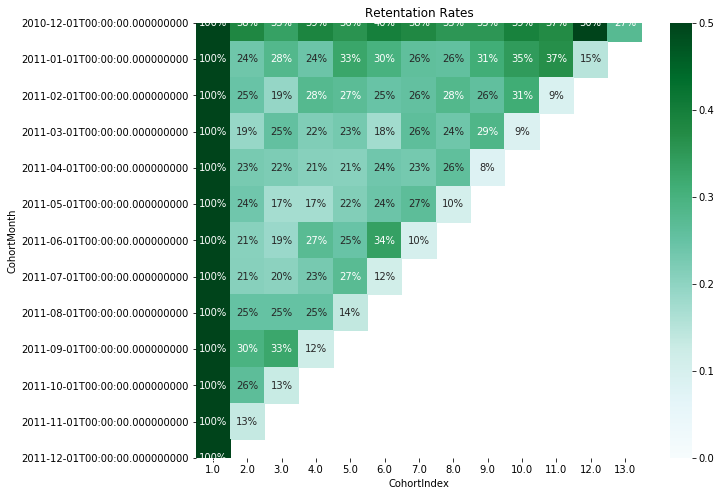

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title('Retentation Rates')
sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin = 0.0,
           vmax = 0.5,
           cmap = 'BuGn')
plt.show()

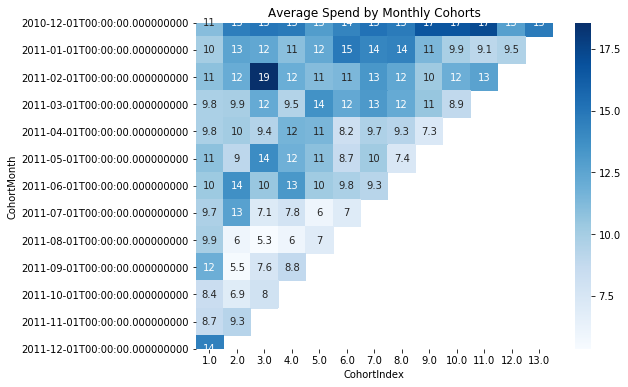

In [24]:
average_quantity.round(1)
plt.figure(figsize=(8,6))
plt.title('Average Spend by Monthly Cohorts')
sns.heatmap(data = average_quantity,
           annot = True,
           cmap = 'Blues')

## RFM Metrics
### RECENCY (R)  -  Which measures how recent was each customer's last purchase (Days since the last customer purchase)
### FREQUENCY (F) - Which measures how many purchases the customer has done in the last 12 months (Number of transactions in the last 12 months)
### MONETARY VALUE (M) - Which measures how much has the customer spent in the last 12 months (Total Spend in the last 12 months)

In [26]:
data['TotalSum'] = data['UnitPrice'] * data['Quantity']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34


In [27]:
print ('Min:{};Max:{}'.format(min(data.InvoiceDate), max(data.InvoiceDate)))

Min:2010-12-01 08:26:00;Max:2011-12-09 12:50:00


In [28]:
# Creating a hypothetical snapshot_day data, by adding one day to the max invoice date
from datetime import datetime, date, time, timedelta
snapshot_date = max(data.InvoiceDate) + timedelta(days = 1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [29]:
# Aggregate date on a customer level
datamart = data.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x : (snapshot_date - x.max()).days,
    'InvoiceNo' : 'count',
    'TotalSum' : 'sum'})

# Rename the columns for easier interpretation
datamart.rename(columns = {'InvoiceDate' : 'Recency',
                          'InvoiceNo' : 'Frequency',
                          'TotalSum' : 'Monetary Value'}, inplace=True)
datamart['Monetary Value'].round(1)
datamart.head()

,Recency,Frequency,Monetary Value
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [30]:
# This will assign label to most recent customer as 4 and least recent customer as 1
r_labels = range(4,0,-1)
r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels)
datamart = datamart.assign(R = r_quartiles.values)
datamart.head()

,Recency,Frequency,Monetary Value,R
CustomerID,,,,
12346.0,326,2,0.00,1
12347.0,2,182,4310.00,4
12348.0,75,31,1797.24,2
12349.0,19,73,1757.55,3
12350.0,310,17,334.40,1


In [31]:
# This will assign label to most frequent customer as 1 and least frequent customer as 4
# Also assign label most monetary value generating customer as 1 and least monetary value generating customer as 4
f_labels = range(1,5)
m_labels = range(1,5)

f_quartiles = pd.qcut(datamart['Frequency'], 4 , labels = f_labels)
m_quartiles = pd.qcut(datamart['Monetary Value'], 4, labels = m_labels)

datamart = datamart.assign(F = f_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values)
datamart.head()

,Recency,Frequency,Monetary Value,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


### Build RFM Segment and RFM Score

#### 1. Concatenate RFM quartile values to RFM_Segment

#### 2. Sum RFM quartiles values to RFM_Score

In [32]:
datamart = datamart[['Recency','Frequency','Monetary Value', 'R','F','M']]
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

datamart['RFM_Segment'] = datamart.apply(join_rfm, axis = 1)
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis = 1)
datamart

,Recency,Frequency,Monetary Value,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3.0
12347.0,2,182,4310.00,4,4,4,444,12.0
12348.0,75,31,1797.24,2,2,4,224,8.0
12349.0,19,73,1757.55,3,3,4,334,10.0
12350.0,310,17,334.40,1,1,2,112,4.0
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3.0
18281.0,181,7,80.82,1,1,1,111,3.0
18282.0,8,13,176.60,4,1,1,411,6.0


In [33]:
datamart.groupby('RFM_Segment').size().sort_values(ascending = False)[:10]

RFM_Segment
444    471
111    392
122    209
344    206
211    181
333    176
222    173
233    164
433    156
322    126
dtype: int64

In [34]:
datamart[datamart['RFM_Segment']=='111'].head(15)

,Recency,Frequency,Monetary Value,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3.0
12353.0,204,4,89.00,1,1,1,111,3.0
12361.0,287,10,189.90,1,1,1,111,3.0
12401.0,303,5,84.30,1,1,1,111,3.0
12402.0,323,11,225.60,1,1,1,111,3.0
12441.0,367,11,173.55,1,1,1,111,3.0
12450.0,156,8,197.88,1,1,1,111,3.0
12503.0,338,1,-1126.00,1,1,1,111,3.0
12505.0,301,1,-4.50,1,1,1,111,3.0


In [35]:
datamart.groupby('RFM_Score').agg(
    {
    'Recency' : 'mean',
    'Frequency': 'mean',
    'Monetary Value' : ['mean','count'] 
    }
).round(1)

Recency Frequency Monetary Value      
             mean      mean           mean count
RFM_Score                                       
3.0         264.8       7.8          109.1   392
4.0         174.5      13.9          227.1   391
5.0         153.0      21.2          346.8   517
6.0          94.3      28.5          491.8   468
7.0          78.8      39.7          724.2   447
8.0          62.7      57.0          974.7   467
9.0          44.2      79.0         1369.6   411
10.0         31.3     115.3         1894.0   440
11.0         20.5     193.9         3845.7   368
12.0          6.7     371.8         8850.7   471

### To Understand data better lets group them in named segments

In [36]:
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Silver'
    else:
        return 'Bronze'
datamart['General_Segment'] = datamart.apply(segment_me, axis = 1)

datamart.groupby('General_Segment').agg(
    {
     'Recency' : 'mean',
     'Frequency' : 'mean',
     'Monetary Value' : ['mean', 'count']
    }
).round(1)

Recency Frequency Monetary Value      
                   mean      mean           mean count
General_Segment                                       
Bronze            219.7      10.9          168.0   783
Gold               25.2     195.1         4130.3  1690
Silver             98.9      36.1          625.8  1899

### Data Pre-processing for K-Means Clustering

#### Exploring distribution of Recency and Frequency

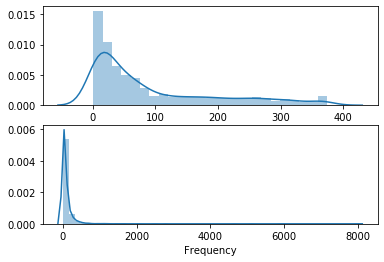

In [37]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.subplot(2,1,1); sns.distplot(datamart['Recency'])
plt.subplot(2,1,2); sns.distplot(datamart['Frequency'])
plt.show()

#### Data Transformations to manage Skewness

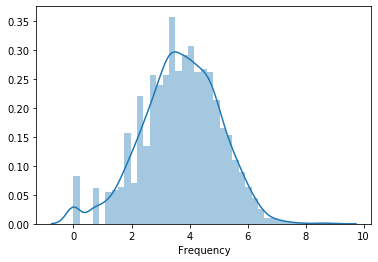

In [38]:
### Logarithmic Transformation (Positive Values Only)
import numpy as np
frequency_log = np.log(datamart['Frequency'])
sns.distplot(frequency_log)
plt.show()

### NOTE

#### Dealing with Negative Values

#### 1. Adding a constant before log transformation
#### 2. Cube Root transformation

In [39]:
datamart_rfm = datamart[['Recency','Frequency','Monetary Value','RFM_Score']]
datamart_rfm.head()
datamart_rfm.describe()

,Recency,Frequency,Monetary Value,RFM_Score
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,92.047118,93.053294,1898.459701,7.501601
std,100.765435,232.471608,8219.345141,2.828144
min,1.000000,1.000000,-4287.630000,3.000000
25%,17.000000,17.000000,293.362500,5.000000
50%,50.000000,42.000000,648.075000,7.000000
75%,143.000000,102.000000,1611.725000,10.000000
max,374.000000,7983.000000,279489.020000,12.000000


#### Centering Variables with different means
#### 1. K-means works well on variables with the same mean
#### 2. Centering Variables is done by subracting average values from each observation.

In [40]:
datamart_centered = datamart_rfm - datamart_rfm.mean()
datamart_centered.describe().round(2)

,Recency,Frequency,Monetary Value,RFM_Score
count,4372.00,4372.00,4372.00,4372.00
mean,-0.00,0.00,-0.00,0.00
std,100.77,232.47,8219.35,2.83
min,-91.05,-92.05,-6186.09,-4.50
25%,-75.05,-76.05,-1605.10,-2.50
50%,-42.05,-51.05,-1250.38,-0.50
75%,50.95,8.95,-286.73,2.50
max,281.95,7889.95,277590.56,4.50


#### Scaling Variables with Different Variance

#### 1. K-means works better on variables with the same variance and Standard Deviation.

#### 2. Scaling variables is done by dividing them by standard deviation of each.

In [41]:
# Scaling the Values
datamart_scaled = datamart_rfm / datamart_rfm.std()
datamart_scaled.describe().round(2)

,Recency,Frequency,Monetary Value,RFM_Score
count,4372.00,4372.00,4372.00,4372.00
mean,0.91,0.40,0.23,2.65
std,1.00,1.00,1.00,1.00
min,0.01,0.00,-0.52,1.06
25%,0.17,0.07,0.04,1.77
50%,0.50,0.18,0.08,2.48
75%,1.42,0.44,0.20,3.54
max,3.71,34.34,34.00,4.24


#### Combining Centering and Scaling

#### 1. Subract mean and divide by standard deviation manually
#### 2. Or use a scaler from scikit-learn library (returns numpy.ndarray object)

In [42]:
### Using 2nd Method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_rfm)
datamart_normalized = scaler.transform(datamart_rfm)
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)
datamart_normalized.describe().round(2)
# print ('mean:', datamart_normalized.mean(axis = 0).round(2))
# print ('std:' , datamart_normalized.std(axis = 0).round(2))

,Recency,Frequency,Monetary Value,RFM_Score
count,4372.00,4372.00,4372.00,4372.00
mean,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-0.90,-0.40,-0.75,-1.59
25%,-0.74,-0.33,-0.20,-0.88
50%,-0.42,-0.22,-0.15,-0.18
75%,0.51,0.04,-0.03,0.88
max,2.80,33.94,33.78,1.59


#### Sequence of Structuring Pre-processing steps

#### 1. Unskew the data -- Log Transformation
#### 2. Standardize to the same average values
#### 3. Scale to the separate standard deviation
#### 4. Store as a separate array to be used for clustering

#### Visualizing the Normalized Data

In [43]:
# ## Unskew the data with log transformation
# import numpy as np
# datamart_log = np.log(datamart_rfm)
# ## Normalize the variables with StandardScaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(datamart_log)
# ## Store it separately for clustering
# datamart_normalized = scaler.transform(datamart_log)
# datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)
# datamart_normalized.describe()

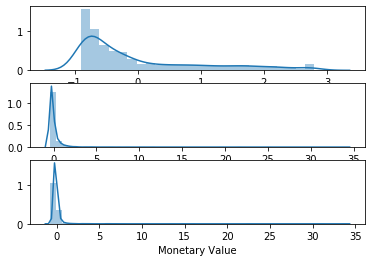

In [44]:
plt.subplot(3,1,1); sns.distplot(datamart_normalized['Recency'])
plt.subplot(3,1,2); sns.distplot(datamart_normalized['Frequency'])
plt.subplot(3,1,3); sns.distplot(datamart_normalized['Monetary Value'])

### K- means Clustering

#### Methods to define the number of clusters

#### 1. Visual Methods  - elbow criterion

* Plot the number of clusters against within-cluster sum of squared errors (SSE) - Sum of Squared distances from every data point to their cluster center.
* Identify the "elbow" in the plot
* Elbow- a point representing an "optimal" number of clusters

#### 2. Mathematical Methods - Silhouette Coefficient
#### 3. Experimentation and Interpretation

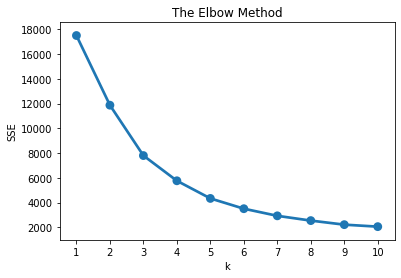

In [45]:
# Way to choose the number of clusters
# Elbow Criterion Method
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_ # Sum of Squared distances to closest cluster center
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k');plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()    

#### The Way to look at it is try to find the point with the largest angle which is so-called elbow, in the above graph the largest angle is at k = 4

### Experimental Approach - analyze segments

In [46]:
# 2-cluster approach
# Import KMeans from sklearn library and initialize it as kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 1)
# Compute k-means clustering on pre-processed data
kmeans.fit(datamart_normalized)
# Extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_
# Analyzing average RFM values of each cluster
# Create a cluster label column in the original DataFrame
datamart_rfm_k2 = datamart_rfm.assign(Cluster = cluster_labels)
# Calculate average RFM values and size for each cluster
datamart_rfm_k2.groupby(['Cluster']).agg({
    'Recency':'mean',
    'Frequency' : 'mean',
    'Monetary Value' : ['mean', 'count']
}).round(0)

Recency Frequency Monetary Value      
           mean      mean           mean count
Cluster                                       
0         209.0      23.0          410.0  1452
1          34.0     128.0         2639.0  2920

#### The results above is a simple table where we see how these two segments differ from each other, It's clear that segment 0 has customers who have not been very recent, are much less frequent with their purchases and their monetary value is much lower than that of segment 1.

In [47]:
# 3 - Cluster Approach
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(datamart_normalized)
cluster_labels = kmeans.labels_
datamart_rfm_k3 = datamart_rfm.assign(Cluster = cluster_labels)
datamart_rfm_k3.groupby(['Cluster']).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary Value' : ['mean', 'count']
}).round(0)

Recency Frequency Monetary Value      
           mean      mean           mean count
Cluster                                       
0          34.0     116.0         2148.0  2930
1         211.0      24.0          407.0  1430
2           5.0    2846.0       118713.0    12

### Profile and Interpret Segments
#### Approach to build customer personas

####  Summary statistics for each cluster e.g. average RFM values
* We have already seen the approach where we assign the cluster label to the original dataset and then calculate average values of each cluster.

#### Note: We have already this above in cell 48 and 49, as we can see there are some inherant differences between 2-segment and 3-segment solutions, while the former is simpler, the 3-segment solution gives more insights.

#### Snake Plots (from Market Research)

* Another approach is to use snake plots - a chart that visualizes RFM values between the segments.
* Market Research technique to compare different segments.
* Visual Representation of each segment attributes.
* Need to first normalize data(center and scale).
* Plot each cluster's average normalized values of each attribute on a line plot.

#### Relative importance of cluster attributes compared to population

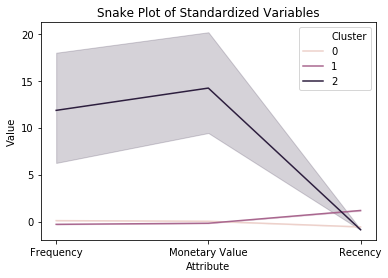

In [48]:
# Preparing data for snake plot
# Transform datamart_normalized as DataFrame and add a Cluster column
datamart_normalized = pd.DataFrame(datamart_normalized,
                                  index = datamart_rfm.index,
                                  columns = datamart_rfm.columns)
datamart_normalized['Cluster'] = datamart_rfm_k3['Cluster']
# Melt the data into a long format so RFM values and metric names are stored in 1 column each
datamart_melt = pd.melt(datamart_normalized.reset_index(),
                       id_vars = ['CustomerID', 'Cluster'],
                       value_vars = ['Recency','Frequency', 'Monetary Value'],
                       var_name  = 'Attribute',
                       value_name = 'Value')
# Visualize the snake plot
plt.title('Snake Plot of Standardized Variables')
sns.lineplot(x='Attribute', y = 'Value', hue = 'Cluster', data = datamart_melt)

#### Relative Importance of Segment Attributes
* Useful technique to identify relative importance of each segment's attribute
* Calculate average values of each cluster

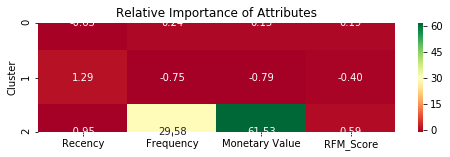

In [49]:
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean()
population_avg = datamart_rfm.mean()
relative_imp = cluster_avg / population_avg - 1
# Understanding the relative_imp using a heatmap
plt.figure(figsize=(8,2))
plt.title('Relative Importance of Attributes')
sns.heatmap(data = relative_imp,
           annot = True,
           fmt = '.2f',
           cmap = 'RdYlGn')
plt.show()

#### Analysis of above results

* The further a ratio from 0, the more important that attribute is for a segment relative to the total population


##          *************************************************** Project ****************************************************

#### Implementation Summary of end-to-end segmentation solution
#### Key Steps
* Gather Data - You will use an updated data that has recency, frequency and monetary values from the previous lessons and an additional variable to make this more interesting.
* Pre-process data the data to ensure k-means clustering works as expected.
* Explore the data and decide on the number of clusters
* Run k-means clustering.
* Analyze and Visualize results

#### We will not be using an additional dataset, this is taken from a different CSV file 'datamart_rfmt.csv' which is loaded below.
#### New Dataset: Tenure, which means time since first transaction. It ultimately defines how long the customer has been with the company, since their first transaction.

In [50]:
datamart_rfmt = pd.read_csv('datamart_rfmt.csv')
datamart_rfmt.head()

,CustomerID,Recency,Frequency,MonetaryValue,Tenure
0,12747,3,25,948.70,362
1,12748,1,888,7046.16,365
2,12749,4,37,813.45,214
3,12820,4,17,268.02,327
4,12822,71,9,146.15,88


### First Step -- Pre- Process the Data

In [51]:
# Import StandardScaler 
from sklearn.preprocessing import StandardScaler

# Apply log transformation
datamart_rfmt_log = np.log(datamart_rfmt)

# Initialize StandardScaler and fit it 
scaler = StandardScaler(); scaler.fit(datamart_rfmt_log)

# Transform and store the scaled data as datamart_rfmt_normalized
datamart_rfmt_normalized = scaler.transform(datamart_rfmt_log)

### Second Step: Calculate and plot sum of squared errors

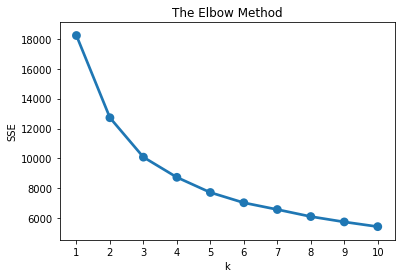

In [52]:
# Fit KMeans and calculate SSE for each k between 1 and 10
for k in range(1, 11):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters= k , random_state=1).fit(datamart_rfmt_normalized)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_   

# Add the plot title, x and y axis labels
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### Third Step: Since the elbow is at 4 so , Build a 4-Cluster solution

In [53]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters = 4, random_state = 1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_rfmt_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

### Fourth Step : Analyze the Segments

In [54]:
# Create a new DataFrame by adding a cluster label column to datamart_rfmt
datamart_rfmt_k4 = datamart_rfmt.assign(Cluster= cluster_labels)

# Group by cluster
grouped = datamart_rfmt_k4.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue Tenure      
           mean      mean          mean   mean count
Cluster                                             
0          26.4      42.9         887.6  274.6  1188
1          30.1       7.5         101.8   40.1   656
2         140.2       7.6         151.1  216.6   878
3         168.5       6.2         104.9  227.6   921